$$ ITI \space AI-Pro: \space Intake \space 44 $$
$$ Deep \space Learning $$
$$ Lab \space no. \space 3 $$

# `01` Assignment 01
- Design your own `deep NN` to classify the `CIFAR 10` images (you can download from keras.dataset) into one of the 10 classes
- Investigate the use of different architectures (`different layers`, `learning rate`, `optimizers`, `loss function`)
- Note you will need to `flatten` the image and use it as your input vector

## `+` Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dropout, BatchNormalization, Dense, Conv2D, MaxPool2D, Flatten

## `+` Load & Preprocess CIFAR 10 Dataset

In [2]:
(X_train, y_train), (X_test, y_test) =keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


In [ ]:
X_train[0].min(),X_train[0].max()

(0, 255)

In [ ]:
unique_labels=np.unique(y_train)
unique_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [3]:
keras.utils.set_random_seed(1234)

### Preview the Images

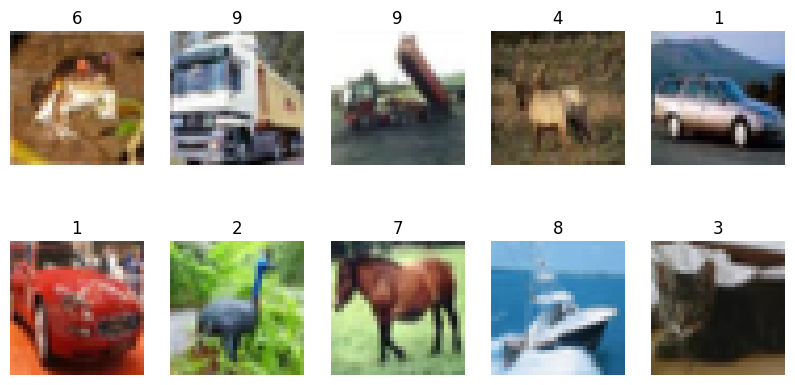

In [ ]:
# plot first few images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(unique_labels[y_train[i][0]])
    plt.axis('off')
plt.show()

### Feature Rescaling

In [4]:
# Rescale Input
X_train =X_train/255.
X_test  =X_test/255.

In [ ]:
X_train.min(),X_train.max()

(0.0, 1.0)

In [ ]:
X_test.min(),X_test.max()

(0.0, 1.0)

### OneHotEncode Target Variable

In [5]:
y_train = keras.utils.to_categorical(y_train)
y_test  = keras.utils.to_categorical(y_test)

## `+` Set Global Parameters

In [6]:
# Hyperparameters
BATCH_SIZE  =64
NUM_CLASSES =10
EPOCHS      =50

## `i` Trial no. 1

### Model Training

In [ ]:
model_CIFAR_10_1=Sequential()
model_CIFAR_10_1.add(Flatten(input_shape=X_train.shape[1:]))
model_CIFAR_10_1.add(Dense(500,activation='relu'))
model_CIFAR_10_1.add(Dense(256,activation='relu'))
model_CIFAR_10_1.add(Dense(128,activation='relu'))
model_CIFAR_10_1.add(Dense(64,activation='relu'))
model_CIFAR_10_1.add(Dense(10,activation='softmax'))

In [ ]:
model_CIFAR_10_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 500)               1536500   
                                                                 
 dense_4 (Dense)             (None, 256)               128256    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 1706558 (6.51 MB)
Trainable params: 1706

In [ ]:
model_CIFAR_10_1.compile(optimizer=keras.optimizers.Adam(0.01), metrics=['accuracy'], loss='categorical_crossentropy')

In [ ]:
model_callback=model_CIFAR_10_1.fit(X_train, y_train,
          epochs=EPOCHS,
          validation_split=0.1,
          batch_size=BATCH_SIZE)

Epoch 1/50
704/704 [==============================] - 21s 28ms/step - loss: 2.2222 - accuracy: 0.2515 - val_loss: 1.9045 - val_accuracy: 0.3172
Epoch 2/50
704/704 [==============================] - 19s 27ms/step - loss: 1.8440 - accuracy: 0.3265 - val_loss: 1.7889 - val_accuracy: 0.3578
Epoch 3/50
704/704 [==============================] - 22s 31ms/step - loss: 1.8062 - accuracy: 0.3425 - val_loss: 1.7963 - val_accuracy: 0.3406
Epoch 4/50
704/704 [==============================] - 19s 26ms/step - loss: 1.7910 - accuracy: 0.3456 - val_loss: 1.8429 - val_accuracy: 0.3274
Epoch 5/50
704/704 [==============================] - 20s 28ms/step - loss: 1.7675 - accuracy: 0.3543 - val_loss: 1.7709 - val_accuracy: 0.3466
Epoch 6/50
704/704 [==============================] - 19s 27ms/step - loss: 1.7742 - accuracy: 0.3542 - val_loss: 1.7834 - val_accuracy: 0.3546
Epoch 7/50
704/704 [==============================] - 20s 28ms/step - loss: 1.7633 - accuracy: 0.3554 - val_loss: 1.8489 - val_accuracy:

### Model Evaluation

In [ ]:
model_CIFAR_10_1.evaluate(X_train,y_train)

1563/1563 [==============================] - 10s 6ms/step - loss: 1.7579 - accuracy: 0.3424


[1.7578628063201904, 0.34244000911712646]

In [ ]:
model_CIFAR_10_1.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.7826 - accuracy: 0.3382


[1.7825833559036255, 0.33820000290870667]

### Result Visualization

In [ ]:
model_callback.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

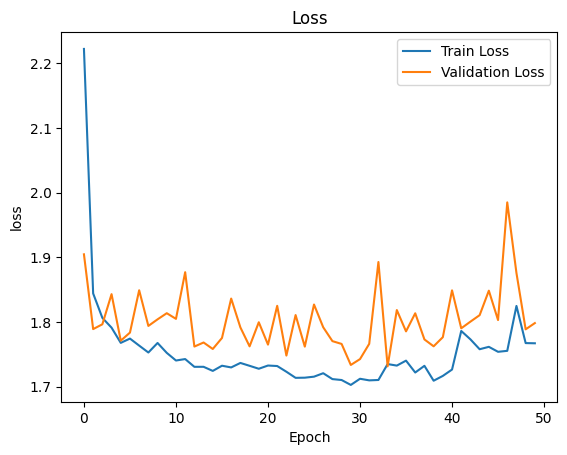

In [ ]:
plt.plot(model_callback.history['loss'], label='Train Loss')
plt.plot(model_callback.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

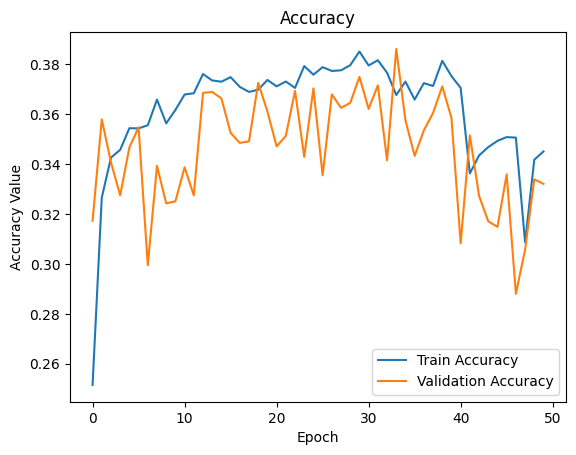

In [ ]:
plt.plot(model_callback.history['accuracy'],label='Train Accuracy')
plt.plot(model_callback.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()

## `ii` Trial no. 2

### Model Training

In [ ]:
model_CIFAR_10_2=Sequential()
model_CIFAR_10_2.add(Flatten(input_shape=X_train.shape[1:]))
model_CIFAR_10_2.add(Dense(600,activation='relu'))
model_CIFAR_10_2.add(Dropout(0.5))
model_CIFAR_10_2.add(Dense(350,activation='relu'))
model_CIFAR_10_2.add(Dropout(0.5))
model_CIFAR_10_2.add(Dense(250,activation='relu'))
model_CIFAR_10_2.add(Dense(128,activation='relu'))
model_CIFAR_10_2.add(Dense(64,activation='relu'))
model_CIFAR_10_2.add(Dense(10,activation='softmax'))

In [ ]:
model_CIFAR_10_2.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), metrics=['accuracy'], loss='kullback_leibler_divergence')

In [ ]:
model_callback2=model_CIFAR_10_2.fit(X_train, y_train,
          epochs=500,
          validation_split=0.1,
          batch_size=140)

Epoch 1/500
322/322 [==============================] - 3s 7ms/step - loss: 2.1241 - accuracy: 0.1975 - val_loss: 1.9855 - val_accuracy: 0.2664
Epoch 2/500
322/322 [==============================] - 2s 6ms/step - loss: 1.9559 - accuracy: 0.2747 - val_loss: 1.8896 - val_accuracy: 0.3142
Epoch 3/500
322/322 [==============================] - 2s 6ms/step - loss: 1.8996 - accuracy: 0.3015 - val_loss: 1.8551 - val_accuracy: 0.3154
Epoch 4/500
322/322 [==============================] - 2s 7ms/step - loss: 1.8691 - accuracy: 0.3116 - val_loss: 1.8490 - val_accuracy: 0.3128
Epoch 5/500
322/322 [==============================] - 2s 6ms/step - loss: 1.8421 - accuracy: 0.3256 - val_loss: 1.7861 - val_accuracy: 0.3442
Epoch 6/500
322/322 [==============================] - 2s 6ms/step - loss: 1.8285 - accuracy: 0.3296 - val_loss: 1.7846 - val_accuracy: 0.3516
Epoch 7/500
322/322 [==============================] - 2s 6ms/step - loss: 1.8016 - accuracy: 0.3406 - val_loss: 1.7478 - val_accuracy: 0.3726

### Model Evaluation

In [ ]:
model_CIFAR_10_2.evaluate(X_train,y_train)
model_CIFAR_10_2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3109 - accuracy: 0.5597


[1.310925841331482, 0.5597000122070312]

### Result Visualization

## Plot the training and validation accuracy and loss

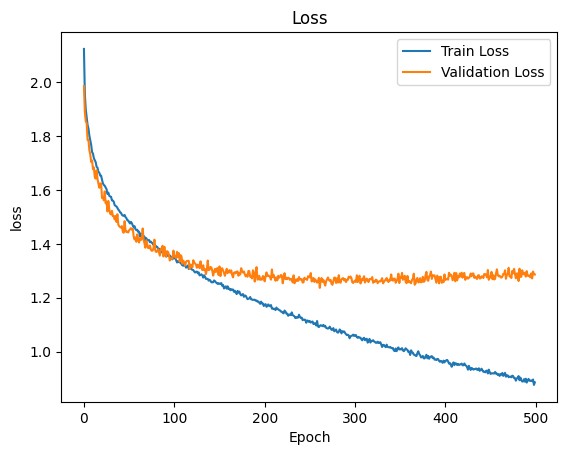

In [ ]:
plt.plot(model_callback2.history['loss'], label='Train Loss')
plt.plot(model_callback2.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

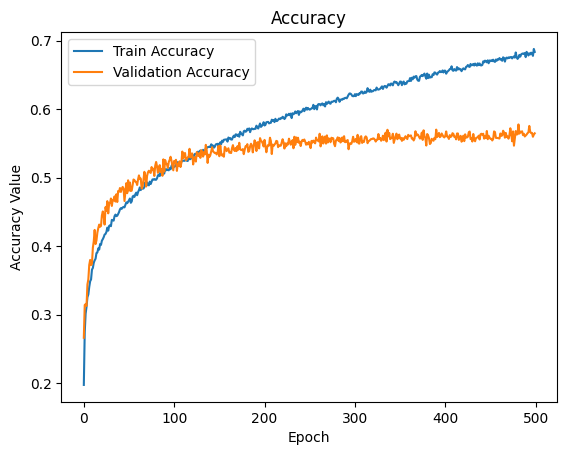

In [ ]:
plt.plot(model_callback2.history['accuracy'],label='Train Accuracy')
plt.plot(model_callback2.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()

**Note:** Add more trials and explore different hyperparameters and design decisions.

------------------------------

# Assignment 02
- Design your `deep convolutional neural network` ( to classify the `CIFAR 10` images into one of the 10 classes
- Invistage the use of different architectures (different `layers`, `kernel sizes`, `pooling`, `learning rate`, `optimizers`, `loss function`)

You have to specify filters and kernel_size. These parameters have no default.

Default padding is valid, which means no zero-padding, and the default strides is (1,1).

$\frac{N - F + 2P}{S} + 1$

$P = \frac{F - 1}{2}$

## `i` Trial no. 1

### Model Training

In [ ]:
model2_CIFAR_10_1 = Sequential()
model2_CIFAR_10_1.add(Conv2D(128, (5, 5), activation='relu', input_shape=X_train.shape[1:]))
model2_CIFAR_10_1.add(BatchNormalization())
model2_CIFAR_10_1.add(MaxPool2D())

model2_CIFAR_10_1.add(Conv2D(64, (3, 3), activation='relu'))
model2_CIFAR_10_1.add(BatchNormalization())
model2_CIFAR_10_1.add(MaxPool2D())

model2_CIFAR_10_1.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model2_CIFAR_10_1.add(BatchNormalization())
model2_CIFAR_10_1.add(MaxPool2D())


model2_CIFAR_10_1.add(Flatten())


model2_CIFAR_10_1.add(Dense(128, activation='relu'))
model2_CIFAR_10_1.add(Dropout(0.5))
model2_CIFAR_10_1.add(Dense(10, activation='softmax'))

In [ ]:
model2_CIFAR_10_1.compile(optimizer=keras.optimizers.Adam(0.01), metrics=['accuracy'], loss='categorical_crossentropy')

In [ ]:
model2_callback=model2_CIFAR_10_1.fit(X_train, y_train,
          epochs=EPOCHS,
          validation_split=0.1,
          batch_size=BATCH_SIZE)

Epoch 1/50
704/704 [==============================] - 11s 9ms/step - loss: 1.7564 - accuracy: 0.3594 - val_loss: 2.1531 - val_accuracy: 0.3520
Epoch 2/50
704/704 [==============================] - 6s 8ms/step - loss: 1.3905 - accuracy: 0.5021 - val_loss: 1.5447 - val_accuracy: 0.4570
Epoch 3/50
704/704 [==============================] - 6s 9ms/step - loss: 1.2350 - accuracy: 0.5652 - val_loss: 1.1401 - val_accuracy: 0.5930
Epoch 4/50
704/704 [==============================] - 6s 8ms/step - loss: 1.1512 - accuracy: 0.6002 - val_loss: 1.1780 - val_accuracy: 0.5788
Epoch 5/50
704/704 [==============================] - 7s 9ms/step - loss: 1.0891 - accuracy: 0.6214 - val_loss: 1.2249 - val_accuracy: 0.5880
Epoch 6/50
704/704 [==============================] - 6s 8ms/step - loss: 1.0554 - accuracy: 0.6354 - val_loss: 1.1900 - val_accuracy: 0.6012
Epoch 7/50
704/704 [==============================] - 6s 8ms/step - loss: 1.0221 - accuracy: 0.6477 - val_loss: 0.9130 - val_accuracy: 0.6918
Epoch

### Model Evaluation

In [ ]:
model2_CIFAR_10_1.evaluate(X_train,y_train)
model2_CIFAR_10_1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1962 - accuracy: 0.7084


[1.1962124109268188, 0.7084000110626221]

### Result Visualization

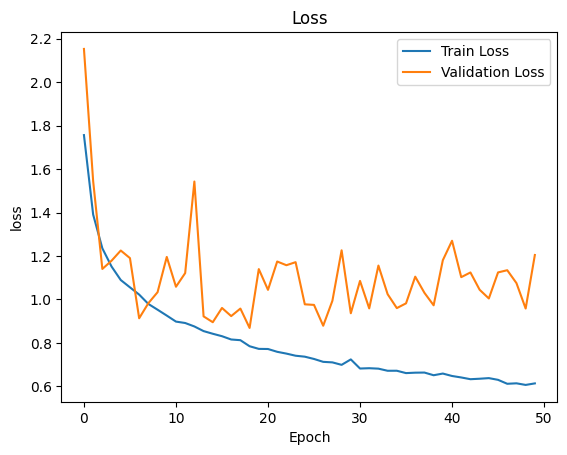

In [ ]:
plt.plot(model2_callback.history['loss'], label='Train Loss')
plt.plot(model2_callback.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

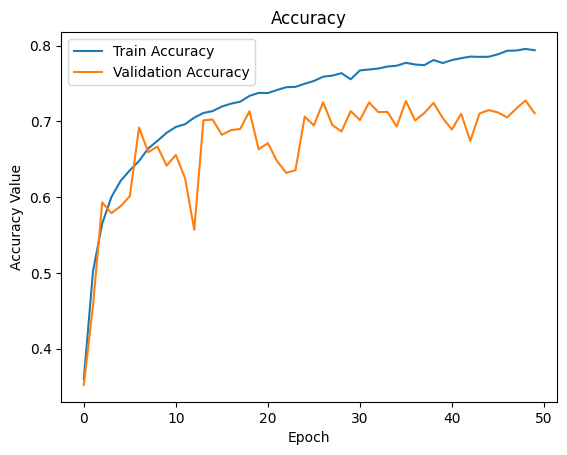

In [ ]:
plt.plot(model2_callback.history['accuracy'],label='Train Accuracy')
plt.plot(model2_callback.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()

## `ii` Trial no. 2

### Model Training

In [33]:
model2_CIFAR_10_2 = Sequential()
model2_CIFAR_10_2.add(Conv2D(128, (5, 5),padding='same', activation='relu', input_shape=X_train.shape[1:]))
model2_CIFAR_10_2.add(BatchNormalization())
model2_CIFAR_10_2.add(MaxPool2D())

model2_CIFAR_10_2.add(Conv2D(64, (3, 3), activation='relu'))
model2_CIFAR_10_2.add(BatchNormalization())
model2_CIFAR_10_2.add(MaxPool2D())

model2_CIFAR_10_2.add(Conv2D(32, (3, 3), activation='relu'))
model2_CIFAR_10_2.add(BatchNormalization())
model2_CIFAR_10_2.add(MaxPool2D())


model2_CIFAR_10_2.add(Flatten())

model2_CIFAR_10_2.add(Dense(10, activation='softmax'))

In [34]:
model2_CIFAR_10_2.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), metrics=['accuracy'], loss='kullback_leibler_divergence')

In [35]:
model2_callback2=model2_CIFAR_10_2.fit(X_train, y_train,
          epochs=50,
          validation_split=0.1,
          batch_size=100)

Epoch 1/50
450/450 [==============================] - 7s 13ms/step - loss: 1.5353 - accuracy: 0.4524 - val_loss: 1.7096 - val_accuracy: 0.3964
Epoch 2/50
450/450 [==============================] - 5s 11ms/step - loss: 1.1958 - accuracy: 0.5773 - val_loss: 1.3613 - val_accuracy: 0.5290
Epoch 3/50
450/450 [==============================] - 5s 11ms/step - loss: 1.0570 - accuracy: 0.6300 - val_loss: 1.1906 - val_accuracy: 0.5752
Epoch 4/50
450/450 [==============================] - 5s 10ms/step - loss: 0.9611 - accuracy: 0.6644 - val_loss: 1.0862 - val_accuracy: 0.6228
Epoch 5/50
450/450 [==============================] - 5s 10ms/step - loss: 0.8876 - accuracy: 0.6896 - val_loss: 2.7451 - val_accuracy: 0.3514
Epoch 6/50
450/450 [==============================] - 5s 11ms/step - loss: 0.8374 - accuracy: 0.7077 - val_loss: 1.3286 - val_accuracy: 0.5694
Epoch 7/50
450/450 [==============================] - 5s 10ms/step - loss: 0.7922 - accuracy: 0.7261 - val_loss: 1.4771 - val_accuracy: 0.5442

### Model Evaluation

In [36]:
model2_CIFAR_10_2.evaluate(X_train,y_train)
model2_CIFAR_10_2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.8159 - accuracy: 0.6580


[1.8159310817718506, 0.6579999923706055]

### Result Visualization

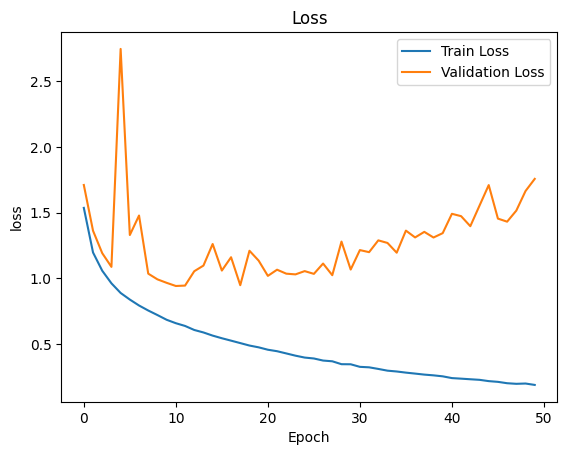

In [37]:
plt.plot(model2_callback2.history['loss'], label='Train Loss')
plt.plot(model2_callback2.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

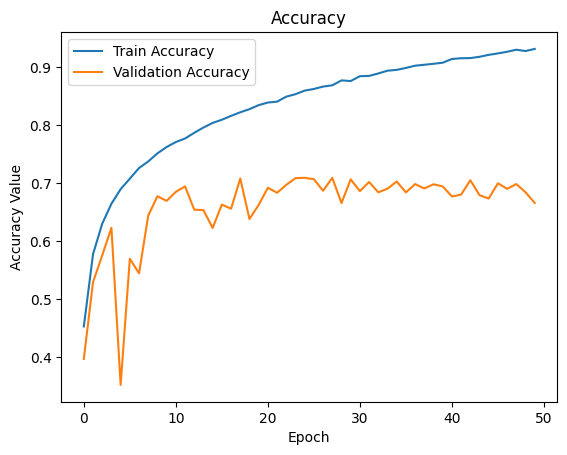

In [38]:
plt.plot(model2_callback2.history['accuracy'],label='Train Accuracy')
plt.plot(model2_callback2.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()

---

# `03` Assignment 03
- Repeat Assignment 1 and 2 using MNIST dataset
- Note that you will need to convert the training labels into categorical using one hot encoding using `to_categorical()` function

## `+` Load MNIST Dataset

In [39]:
(X_train, y_train), (X_test, y_test) =keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [40]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [41]:
X_train[0].min(),X_train[0].max()

(0, 255)

In [43]:
labels_unique=np.unique(y_train)
labels_unique

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### OneHotEncode Target Variable

In [44]:
y_train =keras.utils.to_categorical(y_train)
y_test =keras.utils.to_categorical(y_test)

### Preview the Images

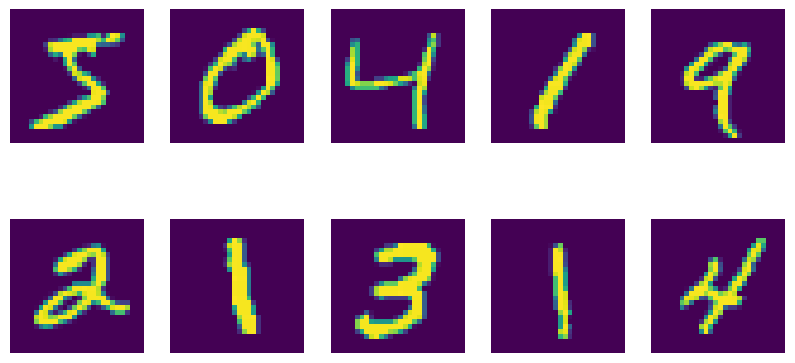

In [46]:
# plot first few images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()

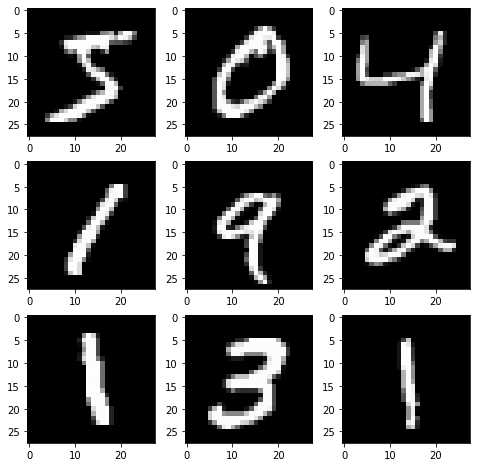

In [ ]:
# plot first few images


### Rescale Independent Features

In [47]:
# Rescale the Input
X_train =X_train/255.
X_test =X_test/255.

## `+` Set Global Parameters

In [48]:
# Hyperparameters
BATCH_SIZE  =64
NUM_CLASSES =10
EPOCHS      =50

## `i` ANN Trials

### Trial no. 1

#### Model Training

In [56]:
model_CIFAR_10_11=Sequential()
model_CIFAR_10_11.add(Flatten(input_shape=X_train.shape[1:]))
model_CIFAR_10_11.add(Dense(500,activation='relu'))
model_CIFAR_10_11.add(Dense(256,activation='relu'))
model_CIFAR_10_11.add(Dense(128,activation='relu'))
model_CIFAR_10_11.add(Dense(64,activation='relu'))
model_CIFAR_10_11.add(Dense(10,activation='softmax'))

In [57]:
model_CIFAR_10_11.compile(optimizer=keras.optimizers.Adam(0.01), metrics=['accuracy'], loss='categorical_crossentropy')

In [58]:
model_callback11=model_CIFAR_10_11.fit(X_train, y_train,
          epochs=20,
          validation_split=0.1,
          batch_size=BATCH_SIZE)

Epoch 1/20
844/844 [==============================] - 6s 5ms/step - loss: 0.3338 - accuracy: 0.9032 - val_loss: 0.1486 - val_accuracy: 0.9610
Epoch 2/20
844/844 [==============================] - 4s 5ms/step - loss: 0.1730 - accuracy: 0.9539 - val_loss: 0.1401 - val_accuracy: 0.9670
Epoch 3/20
844/844 [==============================] - 4s 4ms/step - loss: 0.1658 - accuracy: 0.9591 - val_loss: 0.1352 - val_accuracy: 0.9642
Epoch 4/20
844/844 [==============================] - 4s 4ms/step - loss: 0.1544 - accuracy: 0.9612 - val_loss: 0.1660 - val_accuracy: 0.9575
Epoch 5/20
844/844 [==============================] - 4s 5ms/step - loss: 0.1313 - accuracy: 0.9678 - val_loss: 0.2054 - val_accuracy: 0.9535
Epoch 6/20
844/844 [==============================] - 4s 4ms/step - loss: 0.1526 - accuracy: 0.9650 - val_loss: 0.1262 - val_accuracy: 0.9700
Epoch 7/20
844/844 [==============================] - 3s 4ms/step - loss: 0.1244 - accuracy: 0.9698 - val_loss: 0.2121 - val_accuracy: 0.9513
Epoch 

#### Model Ealuation

In [59]:
model_CIFAR_10_11.evaluate(X_train,y_train)
model_CIFAR_10_11.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1802 - accuracy: 0.9713


[0.18016892671585083, 0.9713000059127808]

#### Result Visualization

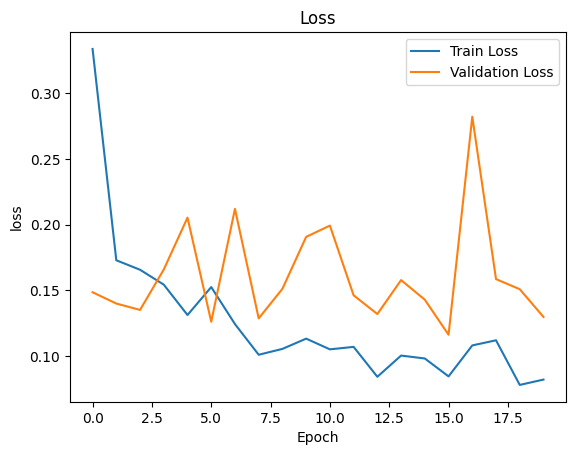

In [60]:
plt.plot(model_callback11.history['loss'], label='Train Loss')
plt.plot(model_callback11.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

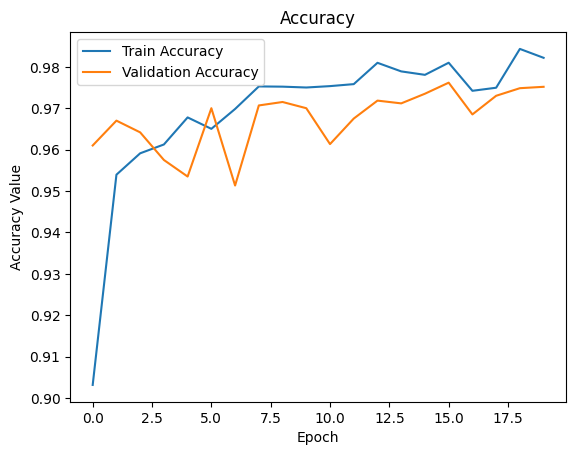

In [61]:
plt.plot(model_callback11.history['accuracy'],label='Train Accuracy')
plt.plot(model_callback11.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()

### Trial no. 2

#### Model Training

In [62]:
model_CIFAR_10_22=Sequential()
model_CIFAR_10_22.add(Flatten(input_shape=X_train.shape[1:]))
model_CIFAR_10_22.add(Dense(600,activation='relu'))
model_CIFAR_10_22.add(Dropout(0.5))
model_CIFAR_10_22.add(Dense(350,activation='relu'))
model_CIFAR_10_22.add(Dropout(0.5))
model_CIFAR_10_22.add(Dense(250,activation='relu'))
model_CIFAR_10_22.add(Dense(128,activation='relu'))
model_CIFAR_10_22.add(Dense(64,activation='relu'))
model_CIFAR_10_22.add(Dense(10,activation='softmax'))

In [63]:
model_CIFAR_10_22.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), metrics=['accuracy'], loss='kullback_leibler_divergence')

In [64]:
model_callback22=model_CIFAR_10_22.fit(X_train, y_train,
          epochs=EPOCHS,
          validation_split=0.1,
          batch_size=BATCH_SIZE)

Epoch 1/50
844/844 [==============================] - 6s 5ms/step - loss: 0.6289 - accuracy: 0.7916 - val_loss: 0.1618 - val_accuracy: 0.9512
Epoch 2/50
844/844 [==============================] - 4s 5ms/step - loss: 0.2380 - accuracy: 0.9278 - val_loss: 0.1099 - val_accuracy: 0.9695
Epoch 3/50
844/844 [==============================] - 4s 5ms/step - loss: 0.1878 - accuracy: 0.9419 - val_loss: 0.0933 - val_accuracy: 0.9728
Epoch 4/50
844/844 [==============================] - 4s 5ms/step - loss: 0.1584 - accuracy: 0.9521 - val_loss: 0.0786 - val_accuracy: 0.9765
Epoch 5/50
844/844 [==============================] - 4s 5ms/step - loss: 0.1414 - accuracy: 0.9579 - val_loss: 0.0705 - val_accuracy: 0.9790
Epoch 6/50
844/844 [==============================] - 4s 5ms/step - loss: 0.1255 - accuracy: 0.9619 - val_loss: 0.0743 - val_accuracy: 0.9778
Epoch 7/50
844/844 [==============================] - 4s 5ms/step - loss: 0.1162 - accuracy: 0.9647 - val_loss: 0.0679 - val_accuracy: 0.9805
Epoch 

#### Model Evaluation

In [65]:
model_CIFAR_10_22.evaluate(X_train,y_train)
model_CIFAR_10_22.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0639 - accuracy: 0.9840


[0.06390024721622467, 0.984000027179718]

#### Result Visualization

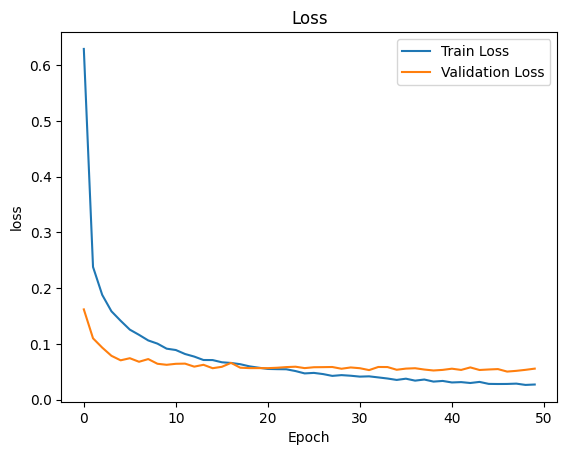

In [66]:
plt.plot(model_callback22.history['loss'], label='Train Loss')
plt.plot(model_callback22.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

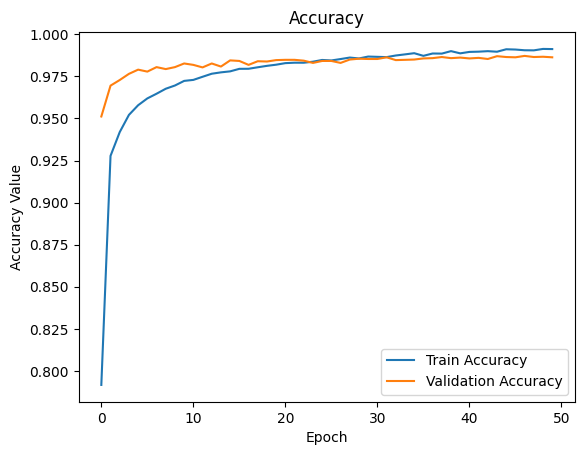

In [67]:
plt.plot(model_callback22.history['accuracy'],label='Train Accuracy')
plt.plot(model_callback22.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()

## `ii` CNN Trials

### Trial no. 1

#### Datasets Reshaping

In [68]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

#### Model Training

In [74]:
model =Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [75]:
model.compile(optimizer=keras.optimizers.Adam(0.01), metrics=['accuracy'], loss='categorical_crossentropy')

In [76]:
model_callback=model.fit(X_train, y_train,
          epochs=36,
          validation_split=0.1,
          batch_size=BATCH_SIZE)

Epoch 1/36
844/844 [==============================] - 6s 5ms/step - loss: 0.1574 - accuracy: 0.9517 - val_loss: 0.0601 - val_accuracy: 0.9827
Epoch 2/36
844/844 [==============================] - 5s 6ms/step - loss: 0.0739 - accuracy: 0.9782 - val_loss: 0.0596 - val_accuracy: 0.9830
Epoch 3/36
844/844 [==============================] - 4s 5ms/step - loss: 0.0655 - accuracy: 0.9815 - val_loss: 0.0825 - val_accuracy: 0.9778
Epoch 4/36
844/844 [==============================] - 4s 5ms/step - loss: 0.0663 - accuracy: 0.9817 - val_loss: 0.0883 - val_accuracy: 0.9793
Epoch 5/36
844/844 [==============================] - 5s 6ms/step - loss: 0.0654 - accuracy: 0.9821 - val_loss: 0.0589 - val_accuracy: 0.9835
Epoch 6/36
844/844 [==============================] - 4s 5ms/step - loss: 0.0561 - accuracy: 0.9851 - val_loss: 0.0641 - val_accuracy: 0.9858
Epoch 7/36
844/844 [==============================] - 4s 5ms/step - loss: 0.0589 - accuracy: 0.9849 - val_loss: 0.0713 - val_accuracy: 0.9833
Epoch 

#### Model Evaluation

In [77]:
model.evaluate(X_train,y_train)
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1327 - accuracy: 0.9821


[0.13273805379867554, 0.9821000099182129]

#### Result Visualization

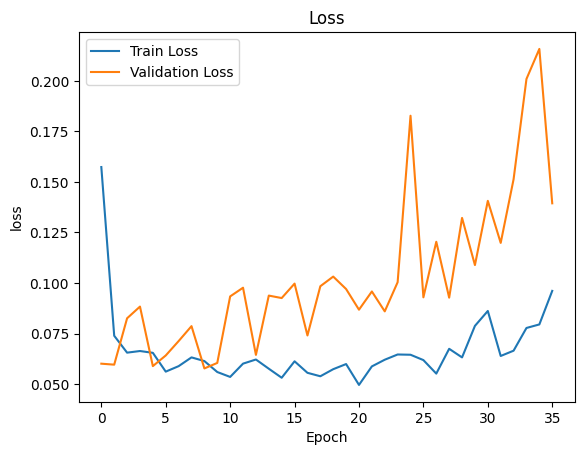

In [78]:
plt.plot(model_callback.history['loss'], label='Train Loss')
plt.plot(model_callback.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

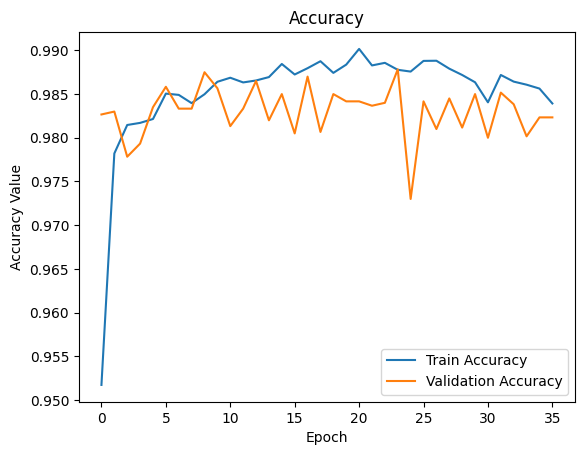

In [79]:
plt.plot(model_callback.history['accuracy'],label='Train Accuracy')
plt.plot(model_callback.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()

### Trial no. 2

#### Model Training

In [80]:
model2 = Sequential()
model2.add(Conv2D(128, (5, 5), activation='relu', input_shape=X_train.shape[1:]))
model2.add(BatchNormalization())
model2.add(MaxPool2D())

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D())

model2.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D())


model2.add(Flatten())


model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

In [81]:
model2.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), metrics=['accuracy'], loss='kullback_leibler_divergence')

In [82]:
model2_callback=model2.fit(X_train, y_train,
          epochs=EPOCHS,
          validation_split=0.1,
          batch_size=BATCH_SIZE)

Epoch 1/50
844/844 [==============================] - 8s 8ms/step - loss: 0.2009 - accuracy: 0.9389 - val_loss: 0.0485 - val_accuracy: 0.9840
Epoch 2/50
844/844 [==============================] - 7s 8ms/step - loss: 0.0687 - accuracy: 0.9800 - val_loss: 0.0409 - val_accuracy: 0.9878
Epoch 3/50
844/844 [==============================] - 6s 7ms/step - loss: 0.0505 - accuracy: 0.9847 - val_loss: 0.0314 - val_accuracy: 0.9902
Epoch 4/50
844/844 [==============================] - 6s 7ms/step - loss: 0.0405 - accuracy: 0.9880 - val_loss: 0.0324 - val_accuracy: 0.9903
Epoch 5/50
844/844 [==============================] - 5s 6ms/step - loss: 0.0329 - accuracy: 0.9900 - val_loss: 0.0312 - val_accuracy: 0.9917
Epoch 6/50
844/844 [==============================] - 6s 7ms/step - loss: 0.0271 - accuracy: 0.9918 - val_loss: 0.0286 - val_accuracy: 0.9910
Epoch 7/50
844/844 [==============================] - 5s 6ms/step - loss: 0.0220 - accuracy: 0.9932 - val_loss: 0.0290 - val_accuracy: 0.9923
Epoch 

#### Model Evaluation

In [83]:
model2.evaluate(X_train,y_train)
model2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0425 - accuracy: 0.9928


[0.042456693947315216, 0.9927999973297119]

#### Result Visualization

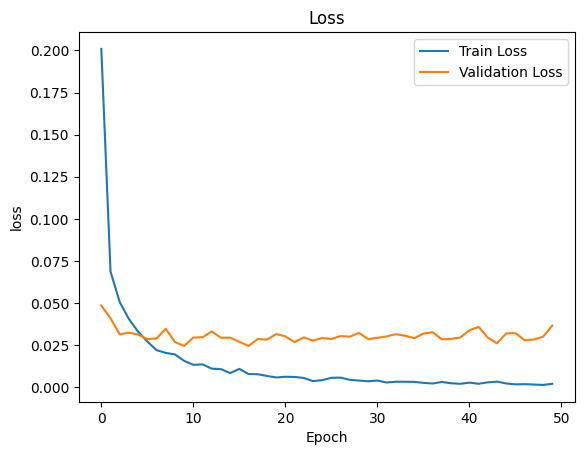

In [84]:
plt.plot(model2_callback.history['loss'], label='Train Loss')
plt.plot(model2_callback.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

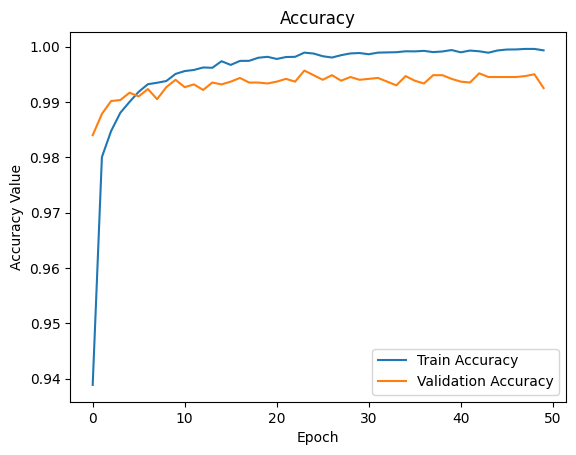

In [85]:
plt.plot(model2_callback.history['accuracy'],label='Train Accuracy')
plt.plot(model2_callback.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$